<a href="https://colab.research.google.com/github/aadilxali/DCGAN/blob/master/AadilAli_PyGANs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Cats Dataset

In [0]:
! git clone https://github.com/aadilxali/cats_annotated_dataset.git
! ls 

Cloning into 'cats_annotated_dataset'...
remote: Enumerating objects: 7519, done.
remote: Counting objects: 100% (7519/7519), done.
remote: Compressing objects: 100% (7517/7517), done.
remote: Total 7519 (delta 1), reused 7519 (delta 1), pack-reused 0
Receiving objects: 100% (7519/7519), 162.94 MiB | 30.41 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Checking out files: 100% (12620/12620), done.
cats_annotated_dataset	sample_data


# Import Celebrities Dataset


In [0]:
! git clone https://github.com/aadilxali/datasets 
! ls


Cloning into 'datasets'...
remote: Enumerating objects: 202477, done.
remote: Counting objects: 100% (202477/202477), done.
remote: Compressing objects: 100% (202474/202474), done.
remote: Total 202477 (delta 1), reused 202476 (delta 0), pack-reused 0
Receiving objects: 100% (202477/202477), 1.29 GiB | 28.52 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Checking out files: 100% (202601/202601), done.
datasets  sample_data


# Imports and Installs

In [0]:
# Google Colab PyTorch utilities
!wget https://raw.githubusercontent.com/StefOe/colab-pytorch-utils/master/utils.py
import utils
gsync = utils.GDriveSync()

# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
import torch

!pip install --no-cache-dir -I pillow

!pip install Pillow==4.0.0
!pip install PIL
!pip install image
# import Image
# import PIL.image

--2018-12-18 01:44:08--  https://raw.githubusercontent.com/StefOe/colab-pytorch-utils/master/utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4519 (4.4K) [text/plain]
Saving to: ‘utils.py’

utils.py            100%[===================>]   4.41K  --.-KB/s    in 0s      

2018-12-18 01:44:08 (69.8 MB/s) - ‘utils.py’ saved [4519/4519]

tcmalloc: large alloc 1073750016 bytes == 0x57a38000 @  0x7fb81221e2a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641
    100% |████████████████████████████████| 2.0MB 36.6MB/s 
    100% |███████████████████

# GANs

Random Seed:  999
Starting Training Loop...
[0/5][0/1583]	Loss_D: 1.8240	Loss_G: 4.6592	D(x): 0.5079	D(G(z)): 0.5771 / 0.0151
[0/5][50/1583]	Loss_D: 0.0006	Loss_G: 35.7328	D(x): 0.9994	D(G(z)): 0.0000 / 0.0000
[0/5][100/1583]	Loss_D: 0.0169	Loss_G: 37.5205	D(x): 0.9926	D(G(z)): 0.0000 / 0.0000
[0/5][150/1583]	Loss_D: 2.6751	Loss_G: 16.1674	D(x): 0.9827	D(G(z)): 0.8463 / 0.0000
[0/5][200/1583]	Loss_D: 0.6953	Loss_G: 6.3351	D(x): 0.9244	D(G(z)): 0.4005 / 0.0057
[0/5][250/1583]	Loss_D: 0.5459	Loss_G: 4.7612	D(x): 0.8928	D(G(z)): 0.2901 / 0.0170
[0/5][300/1583]	Loss_D: 0.4858	Loss_G: 4.5074	D(x): 0.7337	D(G(z)): 0.0454 / 0.0187
[0/5][350/1583]	Loss_D: 0.5542	Loss_G: 6.3643	D(x): 0.9276	D(G(z)): 0.3373 / 0.0042
[0/5][400/1583]	Loss_D: 0.5048	Loss_G: 4.6084	D(x): 0.8536	D(G(z)): 0.2376 / 0.0228
[0/5][450/1583]	Loss_D: 0.7392	Loss_G: 6.2120	D(x): 0.6318	D(G(z)): 0.0231 / 0.0205
[0/5][500/1583]	Loss_D: 0.5062	Loss_G: 4.5115	D(x): 0.8143	D(G(z)): 0.1932 / 0.0213
[0/5][550/1583]	Loss_D: 0.7257	L

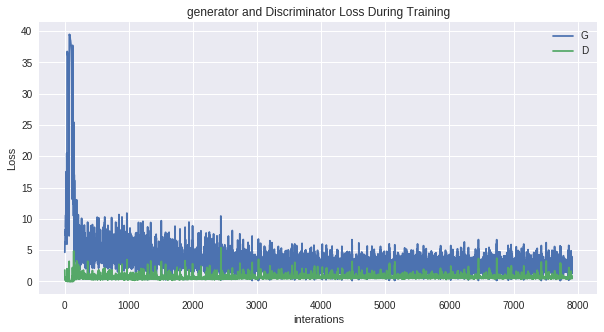

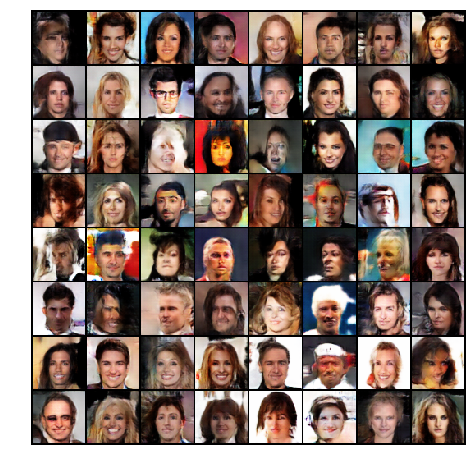

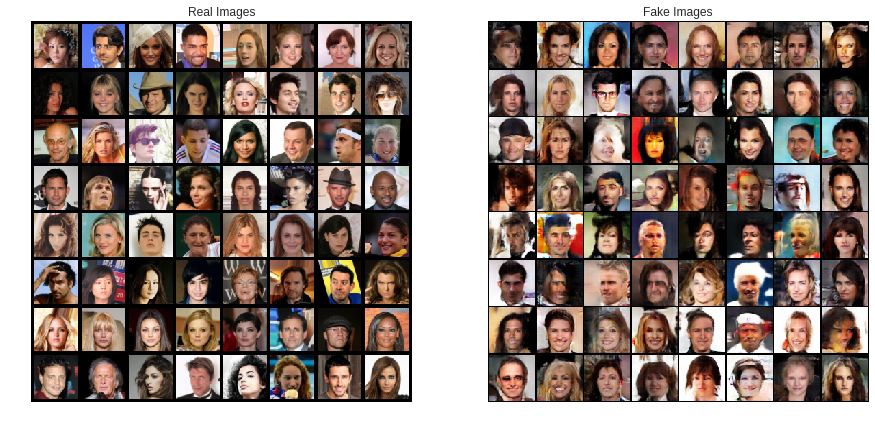

In [0]:
from __future__ import print_function
import argparse
import os
import random
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# set random seed for reproducibility
manualSeed = 999
#manualSeed = random.randint(1,10000) # use if you want new results
print ("Random Seed: ", manualSeed)
random.seed(manualSeed)
torch.manual_seed(manualSeed)

# Root directory for dataset
#dataroot = r"C:\Users\aliaa\Documents\GitHub\datasets\datasets\celeba"
#dataroot = "./cats_annotated_dataset"
dataroot = "./datasets"

# Number for workers for dataloader
workers = 4 

# Batch size during training
batch_size = 128

# Spatial size of training imgaes. All images will be resized to this 
# size using a transformer
image_size = 64

# Number of channels in the training images. For coolous images this is a 3
nc = 3 

# Size of a z latent vector (i.e. size of generator input)
nz = 100

# Size of feature maps in generator, kernel size?
ngf = 64

# Size of feature maps in discriminator
ndf = 64

# Number of training time periods
num_epochs = 5

# learning rate for optimizers
lr = 0.0002

#Beta1 hyperparam for Adam optimizers
beta1 = 0.5

#Number of GPUs available, 0 for CPU mode
ngpu = 1

dataset = dset.ImageFolder(root=dataroot,
                           transform=transforms.Compose([
                                   transforms.Resize(image_size),
                                   transforms.CenterCrop(image_size),
                                   transforms.ToTensor(),
                                   transforms.Normalize((0.5, 0.5, 0.5),
                                                        (0.5, 0.5, 0.5)),
                                                        ]))
# Create the dataloader
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                         shuffle=True, num_workers=workers)

if __name__ == "__main__":
    device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else 
                          "cpu")

#custom weights initialization called on netG and netD
#initialized from a normal distribution with mean=0, stdev=0.2
    def weights_init(m):
        classname = m.__class__.__name__
        if classname.find('Conv') != -1:
            nn.init.normal_(m.weight.data, 0.0, 0.02)
        elif classname.find('BatchNorm') != -1:
            nn.init.normal_(m.weight.data, 1.0, 0.02)
            nn.init.constant_(m.bias.data, 0)
            
    class Generator(nn.Module):
        def __init__(self, ngpu):
            super(Generator, self).__init__()
            self.ngpu = ngpu
            self.main = nn.Sequential(
                #input is Z, going into a convolution (getting changed into a 
                #3x64x64 image)
                nn.ConvTranspose2d(nz, ngf * 8, 4, 1, 0, bias=False),
                nn.BatchNorm2d(ngf * 8),
                nn.ReLU(True),
                # state size. (ngf*8) x 4 x 4
                nn.ConvTranspose2d(ngf * 8, ngf * 4, 4, 2, 1, bias=False),
                nn.BatchNorm2d(ngf * 4),
                nn.ReLU(True),
                # state size. (ngf*4) x 8 x 8
                nn.ConvTranspose2d(ngf * 4, ngf * 2, 4, 2, 1, bias=False),
                nn.BatchNorm2d(ngf * 2),
                nn.ReLU(True),
                # state size. (ngf*2) x 16 x 16
                nn.ConvTranspose2d(ngf * 2, ngf, 4, 2, 1, bias=False),
                nn.BatchNorm2d(ngf),
                nn.ReLU(True),
                # state size. (ngf) x 32 x 32 
                nn.ConvTranspose2d( ngf, nc, 4, 2 , 1, bias=False),
                nn.Tanh()
                #state size. (nc) x 64 x 64
                )
            
        def forward(self, input):
            return self.main(input)
        
    #Create the generator
    netG = Generator(ngpu).to(device)
    # Handle multi-gpu if desired
    if (device.type == 'cuda') and (ngpu > 1):
        netG = nn.DataParallel(netG, list(range(ngpu)))
    
    # Apply the weights_init function to randomly initialize all weights
    # to mean=0, stdev=0.2.
    netG.apply(weights_init)
     
    
    class Discriminator(nn.Module):
        def __init__(self, ngpu):
            super(Discriminator, self).__init__()
            self.ngpu = ngpu
            self.main = nn.Sequential(
                #input is (nc) x 64 x 64
                nn.Conv2d(nc, ndf, 4, 2, 1, bias=False),
                nn.LeakyReLU(0.2, inplace=True),
                #state size. (ndf) x 32 x 32 
                nn.Conv2d(ndf, ndf * 2, 4, 2, 1, bias=False),
                nn.BatchNorm2d(ndf * 2),
                nn.LeakyReLU(0.2, inplace=True),
                # state size. (ndf*2) x 16 x 16
                nn.Conv2d(ndf * 2, ndf * 4, 4, 2, 1, bias=False),
                nn.BatchNorm2d(ndf * 4),
                nn.LeakyReLU(0.2, inplace=True),
                # state size. (ndf*4) x 8 x 8
                nn.Conv2d(ndf * 4, ndf * 8, 4, 2, 1, bias=False),
                nn.BatchNorm2d(ndf * 8),
                nn.LeakyReLU(0.2, inplace=True),
                # state size. (ndf*8) x 4 x 4
                nn.Conv2d(ndf * 8, 1, 4, 1, 0, bias=False),
                nn.Sigmoid()
            )
            
        def forward(self, input):
            return self.main(input)
        
    #Create the Discriminator
    netD = Discriminator(ngpu).to(device)
        
    #Handle multi-gpu if desired
    if (device.type == 'cuda') and (ngpu > 1):
        netD = nn.DataParallel(netD, list(range(ngpu)))
            
    # Apply the weights_init function to randomly initialize all weights
    # to mean=0, st.dev=0.2
    netD.apply(weights_init)

    criterion = nn.BCELoss()
    #Create batch of lantent vectors that we will use to visualize 
    # the progression of the genereator
    fixed_noise = torch.randn(64, nz, 1, 1, device=device)
    #Establish convention for real and fake labels 
    real_label = 1
    fake_label = 0 

    #Setup Adam optimizers for both G and D
    optimizerD = optim.Adam(netD.parameters(), lr=lr, betas=(beta1, 0.999))
    optimizerG = optim.Adam(netG.parameters(), lr=lr, betas=(beta1, 0.999))
    
    # Training Loop
    # Lists to keep track of progress
    img_list = []
    G_losses = []
    D_losses = []
    iters = 0
    
    print("Starting Training Loop...")
    # For each epoch
    for epoch in range(num_epochs):
        # For each batch in the dataloader
        for i, data in enumerate(dataloader, 0):
    
            ############################
            # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
            ###########################
            ## Train with all-real batch
            netD.zero_grad()
            # Format batch
            real_cpu = data[0].to(device)
            b_size = real_cpu.size(0)
            label = torch.full((b_size,), real_label, device=device)
            # Forward pass real batch through D
            output = netD(real_cpu).view(-1)
            # Calculate loss on all-real batch
            errD_real = criterion(output, label)
            # Calculate gradients for D in backward pass
            errD_real.backward()
            D_x = output.mean().item()
    
            ## Train with all-fake batch
            # Generate batch of latent vectors
            noise = torch.randn(b_size, nz, 1, 1, device=device)
            # Generate fake image batch with G
            fake = netG(noise)
            label.fill_(fake_label)
            # Classify all fake batch with D
            output = netD(fake.detach()).view(-1)
            # Calculate D's loss on the all-fake batch
            errD_fake = criterion(output, label)
            # Calculate the gradients for this batch
            errD_fake.backward()
            D_G_z1 = output.mean().item()
            # Add the gradients from the all-real and all-fake batches
            errD = errD_real + errD_fake
            # Update D
            optimizerD.step()
    
            ############################
            # (2) Update G network: maximize log(D(G(z)))
            ###########################
            netG.zero_grad()
            label.fill_(real_label)  # fake labels are real for generator cost
            # Since we just updated D, perform another forward pass of all-fake batch through D
            output = netD(fake).view(-1)
            # Calculate G's loss based on this output
            errG = criterion(output, label)
            # Calculate gradients for G
            errG.backward()
            D_G_z2 = output.mean().item()
            # Update G
            optimizerG.step()
    
            # Output training stats
            if i % 50 == 0:
                print('[%d/%d][%d/%d]\tLoss_D: %.4f\tLoss_G: %.4f\tD(x): %.4f\tD(G(z)): %.4f / %.4f'
                      % (epoch, num_epochs, i, len(dataloader),
                         errD.item(), errG.item(), D_x, D_G_z1, D_G_z2))
    
            # Save Losses for plotting later
            G_losses.append(errG.item())
            D_losses.append(errD.item())
    
            # Check how the generator is doing by saving G's output on fixed_noise
            if (iters % 500 == 0) or ((epoch == num_epochs-1) and (i == len(dataloader)-1)):
                with torch.no_grad():
                    fake = netG(fixed_noise).detach().cpu()
                img_list.append(vutils.make_grid(fake, padding=2, normalize=True))
    
            iters += 1           
    
    plt.figure(figsize=(10,5))
    plt.title("generator and Discriminator Loss During Training")
    plt.plot(G_losses, label="G")
    plt.plot(D_losses, label="D")
    plt.xlabel("interations")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()
    
    fig = plt.figure(figsize=(8,8))
    plt.axis("off")
    ims = [[plt.imshow(np.transpose(i,(1,2,0)), animated=True)] for i in img_list]
    ani = animation.ArtistAnimation(fig, ims, interval=1000, repeat_delay=1000,
                                    blit=True)
    HTML(ani.to_jshtml())
    
    # Grab a batch of real images from the dataloader
    real_batch = next(iter(dataloader))
    
    # Plot the real images
    plt.figure(figsize=(15,15))
    plt.subplot(1,2,1)
    plt.axis("off")
    plt.title("Real Images")
    plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64], padding=5, normalize=True).cpu(),(1,2,0)))
    
    # Plot the fake images from the last epoch
    plt.subplot(1,2,2)
    plt.axis("off")
    plt.title("Fake Images")
    plt.imshow(np.transpose(img_list[-1],(1,2,0)))
    plt.show()